## Artificial Neural Network
Here we make our first implementation of an Artificial Neural Network by both implementing a Class Model the Neural Network.The best advantage of implementing Neural Networks in comparison to normal single layer or perceptron Models is that the MLP Model is able to learn complex functions or generalize complex patterns in the dataset and hence use that to predict novel data points and hence now Neural Networks are used in every type of implementation for Deep Leaning Models and would provide great accuracy results.

### Preprocessing the Data
Here we just preprocess the data that we need to use to implement the ANN Model and use the famous MNIST Handwritten Dataset to see and evaluate our model.

In [2]:
## Here we just define a helper function to import the dataset that we need 
## for training and evaluating our model
## We also apply some generalized preprocessing methods to the images for better results
import os
import struct 
import numpy as np

def load_mnist(path,kind = 'train'):
    labels_path = os.path.join(path,'%s-labels.idx1-ubyte' % kind)
    
    images_path = os.path.join(path, '%s-images.idx3-ubyte' % kind)
    
    with open(labels_path,'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        
        labels = np.fromfile(lbpath,dtype = np.uint8)
        
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
        
        images = np.fromfile(imgpath,dtype = np.uint8).reshape(len(labels),784)
        
        images = ((images/255.) - 5.)*2
        
    return images, labels

## Here we just import our dataset from the provided directories with this file
X_train, y_train = load_mnist('',kind = 'train')
X_test , y_test = load_mnist('',kind = 't10k')

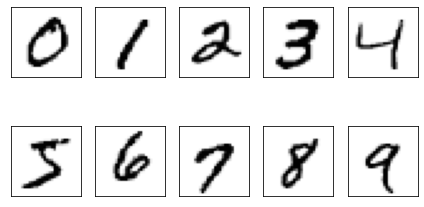

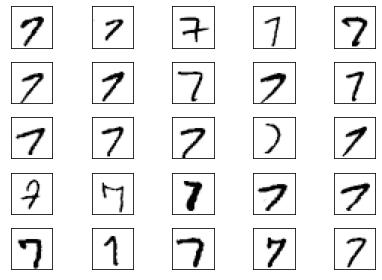

In [4]:
## Let us visualize the different numbers that are given are given in the dataset
import matplotlib.pyplot as plt

fig , ax = plt.subplots(nrows = 2,ncols = 5,sharex = True,sharey = True)

ax =ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28,28)
    ax[i].imshow(img,cmap = 'Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## And here we just visualize the different ways a particular number can be represented 
## in the dataset and hence can see that the model needs to generalize different patterns to give out better results
fig , ax = plt.subplots(nrows = 5,ncols = 5,sharex = True,sharey = True)

ax =ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28,28)
    ax[i].imshow(img,cmap = 'Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [11]:
## Since we might need to access this dataset again and again hence we save the
## dataset in a compressed form and hence can import it whenever needed
import numpy as np
np.savez_compressed('mnist_scaled.npz',X_train = X_train,y_train = y_train,X_test = X_test,y_test=y_test)
mnist = np.load('mnist_scaled.npz')
X_train , y_train , X_test , Y_test = [mnist[f] for f in mnist.files]

## Implementing the Model
Here we simply implement our model that we have implemented in the provided file with the required characteristics as shown and hence evaluate it to see how much it has generalized to the Dataset

In [10]:
## Importing and training the model
from NeuralNetwork import NeuralNetMLP
NN = NeuralNetMLP(n_hidden = 100,l2 = 0.001,epochs = 200,eta = 0.00001,minibatch_size=100,shuffle=True,seed = 1)
NN.fit(X_train = X_train[:55000],y_train = y_train[:55000],X_valid =X_train[55000:],y_valid = y_train[55000:])
## hence we are training our model and validating our model by dividing the dataset respectively

200/200 | Cost: 55581.58 | Train/Valid Acc. : 87.59%/90.20%%

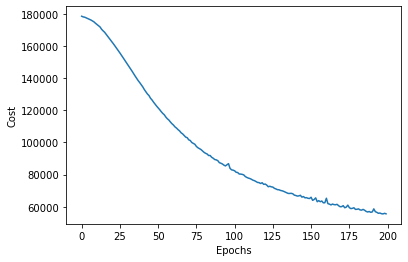

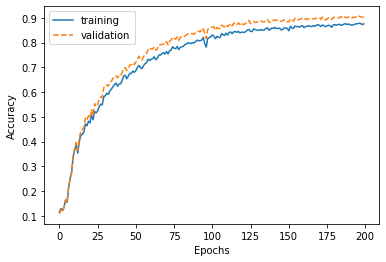

In [14]:
## Here we just see that the implementation of our model and how the cost and the respective accuracies behave 
import matplotlib.pyplot as plt
plt.plot(range(NN.epochs),NN.eval_['cost'])
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()
## Hence we can that the cost tends to decrease continously

## Now we visualize our model accuracies
plt.plot(range(NN.epochs),NN.eval_['train_acc'],label = 'training')
plt.plot(range(NN.epochs),NN.eval_['valid_acc'],label = 'validation',linestyle = '--')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()
## Hence we can also see that the model accuracies increase without a large difference between them

In [15]:
## here we just see our models training and testing accuracy and assess from that how the model performs
y_train_pred = NN.predict(X_train)
y_test_pred = NN.predict(X_test)
acc = (np.sum(y_test == y_test_pred)).astype(float)/X_test.shape[0]
train_acc = (np.sum(y_train == y_train_pred)).astype(float)/X_train.shape[0]
print('Training Accuracy: %.2f%%' %(train_acc*100))
print('Testing accuracy: %.2f%%' %(acc*100))
## Hence we can see that the implemented model performs good enough on the dataset

Training Accuracy: 87.81%
Testing accuracy: 88.59%


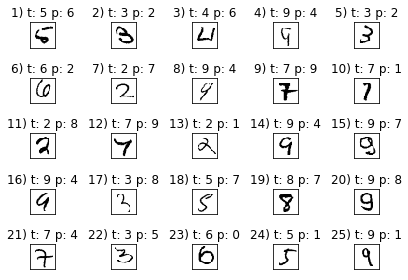

In [16]:
## Now we just visualize what are the type of patterns that the model cannot generalize to so that it cannot predict those datapoints correctly
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]

fig ,ax = plt.subplots(nrows = 5,ncols = 5,sharex = True,sharey = True)
ax =ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28,28)
    ax[i].imshow(img,cmap = 'Greys',interpolation = 'nearest')
    ax[i].set_title('%d) t: %d p: %d' %(i+1,correct_lab[i],miscl_lab[i]))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()